In [1]:
# Smoothing tests
# OOP
# Team 2 - Data Manipulation
#
#
# EGuandulain

# MAIT - First Semester


# -------------------------------------------- Method No. 1   Savitzky-Golay
#
# A Savitzky–Golay filter is a digital filter that can be applied to a set of digital data points for the purpose of smoothing the data,
# that is, to increase the precision of the data without distorting the signal tendency.
# This is achieved, in a process known as convolution.
#
# -------------------------------------------- Method No. 2  Moving Average
#
# It allows us to smooth the data by grouping the values in a window of n numbers (starting from position 1)
# the average of the values is calculated and the window is moved 1 position.
# Each result of the calculation is saved in a new array conformed by the smoothed data.
#

# --------------------------------------------Method No. 2  Exponential Smoothing
#
#


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
from scipy.signal import savgol_filter

from datetime import datetime
# from Class1_test import GUI_class_test

df = pd.read_csv('energydata_complete.csv', sep=",")

df


class GUI_class:
    '''
    Primary Class for GUI Dataset
    '''

    def __init__(self, arg_df, arg_filename=''):
        self.data = arg_df
        self.original_data = arg_df
        self.filename = arg_filename

        self.elements = self.data.size
        self.rows = self.data.shape[0]
        self.cols = self.data.shape[1]
        self.nans = self.data.isna().sum().sum()


In [3]:
class GUI_child_Smoothening(GUI_class):
    '''
    Child Class for Smoothening
    '''

    def __init__(self, arg_df, arg_filename, x_axis, x_axis_start, x_axis_end, y_axis, window_size=5, poly_degree=2, alpha=0):

        GUI_class.__init__(self, arg_df, arg_filename)

        self.x_axis = x_axis
        self.x_axis_start = x_axis_start
        self.x_axis_end = x_axis_end
        self.y_axis = y_axis
        self.window_size = window_size
        self.poly_degree = poly_degree
        self.alpha = alpha
        self.y_filtered = []
        self.y_filt_complete = []


GUI_data = GUI_class(df)


In [4]:
x_axis = 'date'
x_axis_start = '2016-01-11 17:00:00'
x_axis_end = '2016-05-15 18:00:00'
y_axis = 'T1'
window_size = 5
poly_degree = 2
alpha = 0.3


In [5]:
GUI_data_smooth = GUI_child_Smoothening(
    GUI_data.data, GUI_data.filename, x_axis, x_axis_start, x_axis_end, y_axis, window_size, poly_degree, alpha)

GUI_data.data


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [6]:


class smoothing_class:


    def __init__(self, GUI_smooth_object):

        self.data = GUI_smooth_object.data
        self.x = GUI_smooth_object.x_axis
        self.y = GUI_smooth_object.y_axis
        self.x_start = GUI_smooth_object.x_axis_start
        self.x_end = GUI_smooth_object.x_axis_end
        self.window = GUI_smooth_object.window_size
        self.grade = GUI_smooth_object.poly_degree
        self.alpha = GUI_smooth_object.alpha

        self.index_min = int(self.data.index[self.data[self.x] == self.x_start].to_list()[0])                
        self.index_max = int(self.data.index[self.data[self.x] == self.x_end].to_list()[0])

        # Create a new array from the original bigger array
        self.new_x_axis = self.data[self.x][self.index_min: self.index_max]
        # Indexes = (start to end), not 0 to 1
        self.new_y_axis = self.data[self.y][self.index_min: self.index_max]

        self.new_x_axis = self.new_x_axis.reset_index(drop=True)
        self.new_y_axis = self.new_y_axis.reset_index(drop=True)

        self.y_filtered = []
        self.y_filt_complete = []











    def savgol_filter(self):

        self.y_filtered = savgol_filter(self.new_y_axis, self.window, self.grade)

        x1 = []
        y1 = []
        y2 = []

        for i in range(0, len(self.y_filtered), 1):
            x1.append(i)
            y1.append(self.new_y_axis[i])
            y2.append(self.y_filtered[i])

        fig, ax = plt.subplots(figsize=(15, 5))
        sc = ax.plot(x1, y1)
        sc = ax.plot(x1, y2)

        ax.set_xlabel('Time')
        ax.set_ylabel('Value')

        self.fig = fig
        self.fig

    def mov_average_filter(self):

        i = 0

        moving_averages = []

        while i < len(self.new_y_axis) - self.window:

            window_sum = self.new_y_axis[i: i + self.window]
            window_average = round(sum(window_sum) / self.window, 2)
            moving_averages.append(window_average)
            i += 1

        for i in range(0, round(self.window/2), 1):
            moving_averages.insert(0, None)
        for i in range(0, round(self.window/2), 1):
            moving_averages.append(None)

        self.y_filtered = moving_averages

        x1 = []
        y1 = []
        y2 = []

        for i in range(0, len(self.new_y_axis), 1):
            x1.append(i)
            y1.append(self.new_y_axis[i])

        for i in range(0, len(self.y_filtered), 1):
            y2.append(self.y_filtered[i])

        fig, ax = plt.subplots(figsize=(15, 5))

        min_len = min(len(y1), len(y2))

        ax.plot(x1, y1, '*-', label='Real Data')
        ax.plot(x1[:min_len], y2[:min_len], c='black', label='Smoothed Data')

        ax.set_xlabel('Time')
        ax.set_ylabel('Value')

        self.fig = fig
        self.fig

    def exponential_filter(self):

        self.y_filtered = [self.new_y_axis[0]]

        for i in range(1, len(self.new_y_axis)):
            smoothed_val = self.alpha * \
                self.new_y_axis[i] + (1 - self.alpha) * self.y_filtered[i-1]
            self.y_filtered.append(smoothed_val)

        x1 = []
        y1 = []
        y2 = []

        for i in range(0, len(self.y_filtered), 1):
            x1.append(i)
            y1.append(self.new_y_axis[i])
            y2.append(self.y_filtered[i])

        fig, ax = plt.subplots(figsize=(15, 5))
        sc = ax.plot(x1, y1)
        sc = ax.plot(x1, y2)

        ax.set_xlabel('Time')
        ax.set_ylabel('Value')

        self.fig = fig
        self.fig

    def create_new_df(self, method_name, df_to_change):
        df = self.data
        column_to_skip = self.x

        if method_name == 'Savitzky-Golay':
            for column in df.columns:
                if column != column_to_skip:
                    df_to_change[column] = savgol_filter(df[column], self.window, self.grade)

        print(df_to_change)

        if method_name == "Moving Average":

            for column in df.columns:
                if column != column_to_skip:

                    mov_avg_complete = []
                    i = 0
                    while i < len(self.data[self.y]) - self.window:

                        window_sum_com = self.data[self.y][i: i + self.window]
                        window_avg_com = round(
                            sum(window_sum_com) / self.window, 2)
                        mov_avg_complete.append(window_avg_com)
                        i += 1

                    for i in range(0, round(self.window/2), 1):
                        mov_avg_complete.insert(0, None)

                    for i in range(0, round(self.window/2), 1):
                        mov_avg_complete.append(None)

                    #self.y_filt_complete = mov_avg_complete
                    df_to_change[column] = mov_avg_complete

        if method_name == "exponential_filter":

            self.y_filt_complete = [self.data[self.y][0]]

            for i in range(1, len(self.data[self.y])):
                smoothed_val_com = self.alpha * \
                    self.data[self.y][i] + \
                    (1 - self.alpha) * self.y_filt_complete[i-1]
                self.y_filt_complete.append(smoothed_val_com)

        # if len(self.data[self.y]) < len(self.y_filt_complete):
        #    diff = len(self.y_filt_complete) - len(self.data[self.y])
        #    self.data[self.y] = np.pad(self.data[self.y], (0, diff), 'constant', constant_values=(0))

        # if len(self.y_filt_complete) < len(self.data[self.y]):
        #    diff = len(self.data[self.y]) - len(self.y_filt_complete)
        #    self.y_filt_complete = np.pad(self.y_filt_complete, (0, diff), 'constant', constant_values=(0))


In [7]:
smooth_object = smoothing_class(GUI_data_smooth)


In [8]:
a = smooth_object.new_y_axis
print(a.tolist())
print("size: ", len(a))


[19.89, 19.89, 19.89, 19.89, 19.89, 19.89, 19.89, 19.8566666666667, 19.79, 19.8566666666667, 19.9266666666667, 20.066666666666695, 20.1333333333333, 20.26, 20.4266666666667, 20.566666666666695, 20.73, 20.8566666666667, 20.89, 20.89, 20.89, 20.963333333333296, 21.033333333333296, 21.1, 21.1333333333333, 21.2, 21.29, 21.3566666666667, 21.39, 21.5, 21.5, 21.533333333333296, 21.6, 21.6, 21.6, 21.6, 21.6, 21.6, 21.6, 21.5, 21.5, 21.39, 21.39, 21.29, 21.29, 21.26, 21.2, 21.1666666666667, 21.075, 21.0, 21.0, 20.9266666666667, 20.89, 20.89, 20.79, 20.79, 20.7, 20.7, 20.6, 20.6, 20.566666666666695, 20.5, 20.5, 20.4266666666667, 20.39, 20.39, 20.29, 20.29, 20.23, 20.2, 20.2, 20.1666666666667, 20.1, 20.1, 20.033333333333296, 20.0, 20.0, 20.0, 19.9266666666667, 19.89, 19.89, 19.89, 19.89, 19.89, 19.823333333333295, 19.8566666666667, 19.79, 19.79, 19.79, 19.79, 19.79, 19.79, 19.89, 19.89, 19.89, 19.89, 19.8566666666667, 19.79, 19.79, 19.79, 19.76, 19.7, 19.7, 19.7, 19.73, 19.79, 19.89, 19.89, 19.89

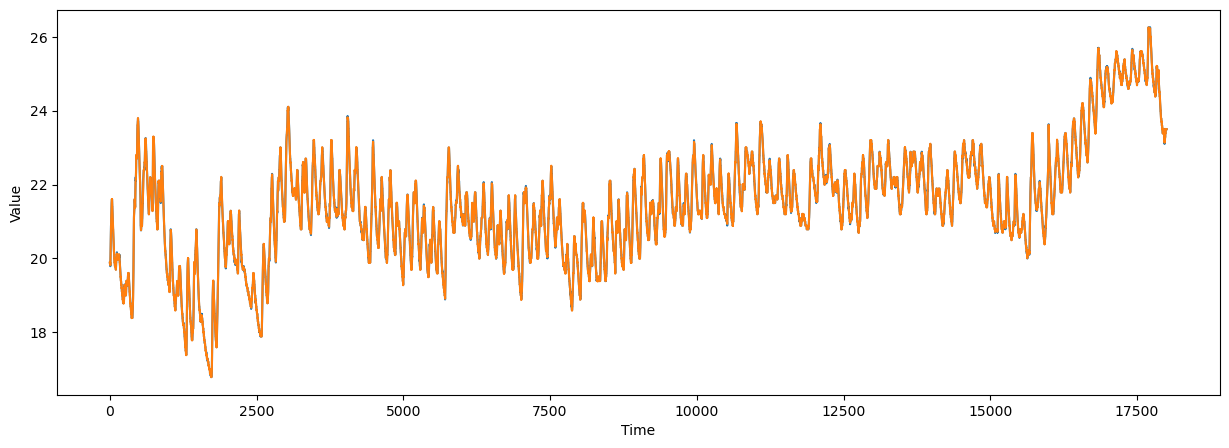

In [9]:


smooth_object.savgol_filter()


In [10]:
smooth_object.create_new_df(
    method_name='Savitzky-Golay', df_to_change=smooth_object.data)


                      date  Appliances     lights         T1       RH_1  \
0      2016-01-11 17:00:00   62.285714  29.428571  19.890000  47.585810   
1      2016-01-11 17:10:00   54.857143  30.285714  19.890000  46.734762   
2      2016-01-11 17:20:00   51.714286  32.571429  19.890000  46.240857   
3      2016-01-11 17:30:00   52.571429  37.428571  19.890000  46.187810   
4      2016-01-11 17:40:00   54.000000  40.000000  19.890000  46.188190   
...                    ...         ...        ...        ...        ...   
19730  2016-05-27 17:20:00   77.714286  -0.857143  25.535238  46.584857   
19731  2016-05-27 17:30:00  126.857143   2.571429  25.520000  46.480857   
19732  2016-05-27 17:40:00  260.571429   7.428571  25.494286  46.701238   
19733  2016-05-27 17:50:00  360.285714   9.714286  25.490476  46.732286   
19734  2016-05-27 18:00:00  461.428571  10.571429  25.505714  46.711429   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  4

Outliers Recognition

In [11]:


import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


df = pd.read_csv("energydata_complete.csv")


class Outliers_Recognization():

    def __init__(self, df, WorkingColumn, date_column):
        self.df = df
        self.WorkingColumn = WorkingColumn
        self.date_column = date_column

    def line_plot(self, ax, label):
        ax.plot(self.df.index, self.df[self.WorkingColumn], label=label, color='b', alpha=1)
        ax.set_xlabel('Number of Samples')
        ax.set_ylabel('Value')
        ax.legend()

    def box_plot(self, df1, title):
        fig, ax = plt.subplots()
        ax.boxplot(df1, vert=False)
        ax.set_xlabel('Value')
        ax.set_ylabel(' ')
        ax.set_title(title)

    def Z_score(self, threshold):
        # Box plot 1
        fig1 = self.box_plot(self.df[self.WorkingColumn], 'Box Plot of Original Data with Outliers')

        z = np.abs(stats.zscore(self.df[self.df.select_dtypes(include=[np.number]).columns]))
        self.df_Without_Outliers = self.df.mask((z > threshold))
        self.df_Without_Outliers[self.date_column] = self.df[self.date_column]

        # Boc plot 2
        array= self.df_Without_Outliers[self.WorkingColumn]
        array = array[~np.isnan(array)]
        fig2 = self.box_plot(array, 'Box Plot of Data Without Outliers')

        fig, ax = plt.subplots()
        self.line_plot(ax, 'Original Data')
        ax.plot(self.df_Without_Outliers.index, self.df_Without_Outliers[self.WorkingColumn], label='Data without Outliers', color='r', alpha=1)
        ax.legend()
        ax.set_title('Outlier Recognition with Z-Score')
        return self.df_Without_Outliers
    
    def Quantile(self, Q1, Q2):
        fig1=self.box_plot(self.df[self.WorkingColumn],'Box Plot of Original Data with Outliers')
        
        L_Q = self.df.quantile(Q1, interpolation="nearest")
        U_Q = self.df.quantile(Q2, interpolation="nearest")
        self.df_Without_Outliers = self.df.mask((self.df > U_Q) | (self.df < L_Q))
        self.df_Without_Outliers[self.date_column]=self.df[self.date_column]
        
        array= self.df_Without_Outliers[self.WorkingColumn]
        array = array[~np.isnan(array)]
        fig2=self.box_plot(array,'Box Plot of Data Without Outliers')

        fig, ax = plt.subplots()
        self.line_plot(ax, 'Original Data')
        ax.plot(self.df_Without_Outliers.index, self.df_Without_Outliers[self.WorkingColumn],label='Data without Outliers', color='r', alpha=1)
        ax.legend()
        ax.set_title('Outlier Recognition with Quantile')
        return self.df_Without_Outliers
    
    
    def Modified_Z_score(self,threshold):
        fig1=self.box_plot(self.df[self.WorkingColumn],'Box Plot of Original Data with Outliers')
        
        median = self.df.select_dtypes(include=[np.number]).median()
        MAD = stats.median_abs_deviation(self.df.select_dtypes(include=[np.number]).mad())
        z = 0.6745 * np.abs((self.df[self.df.select_dtypes(include=[np.number]).columns] - median) / MAD)
        self.df_Without_Outliers = self.df.mask((z >= threshold).any(axis=1))
        self.df_Without_Outliers[self.date_column]=self.df[self.date_column]

        array= self.df_Without_Outliers[self.WorkingColumn]
        array = array[~np.isnan(array)]
        fig2=self.box_plot(array,'Box Plot of Data Without Outliers')
        
        fig, ax = plt.subplots()
        self.line_plot(ax, 'Original Data')
        ax.plot(self.df_Without_Outliers.index, self.df_Without_Outliers[self.WorkingColumn],label='Data without Outliers', color='r', alpha=1)
        ax.legend()
        ax.set_title('Outlier Recognition with Quantile')
        
        return self.df_Without_Outliers
    


    def Isolation_Forest(self,contamination):
        fig1=self.box_plot(self.df[self.WorkingColumn],'Box Plot of Original Data with Outliers')

        X = self.df.select_dtypes(include=[np.number]).values
        clf = IsolationForest(random_state=0, contamination=contamination)
        clf.fit(X)
        outliers = clf.predict(X) == -1
        self.df_Without_Outliers = self.df.copy()
        self.df_Without_Outliers.loc[outliers, self.df.select_dtypes(include=[np.number]).columns] = np.nan


        array= self.df_Without_Outliers[self.WorkingColumn]
        array = array[~np.isnan(array)]
        fig2=self.box_plot(array,'Box Plot of Data Without Outliers')

        fig, ax = plt.subplots()
        self.line_plot(ax, 'Original Data')
        ax.plot(self.df_Without_Outliers.index, self.df_Without_Outliers[self.WorkingColumn],label='Data without Outliers', color='r', alpha=1)
        ax.legend()
        ax.set_title('Outlier Recognition with Quantile')

        return self.df_Without_Outliers




In [12]:
out_obj = Outliers_Recognization(df, 'Appliances', 'date')


,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60.0,30.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19731,2016-05-27 17:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19732,2016-05-27 17:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19733,2016-05-27 17:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


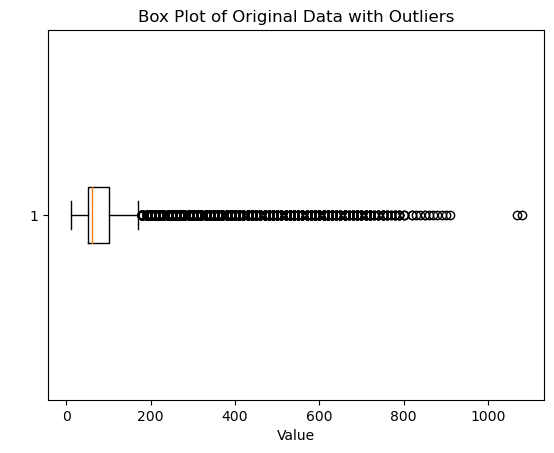

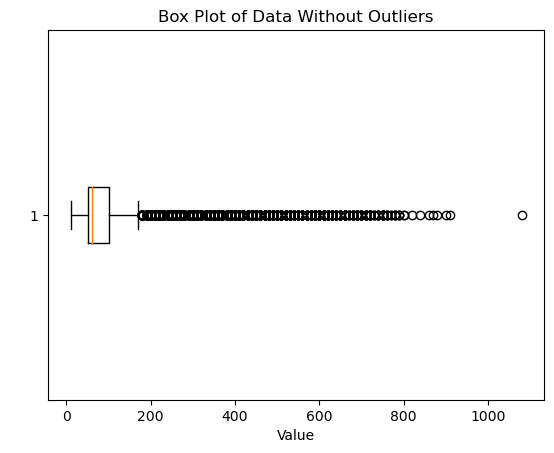

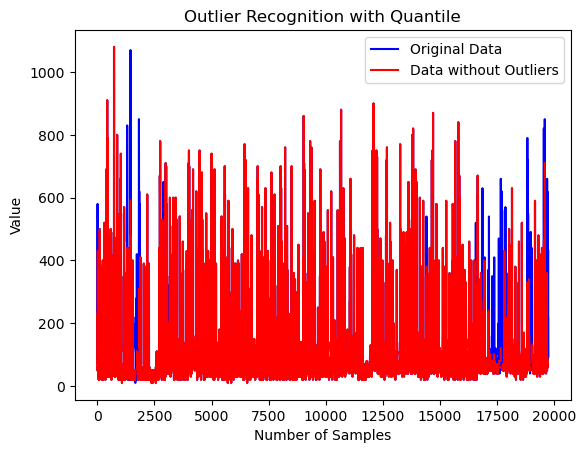

In [13]:
out_obj.Isolation_Forest(0.05)


In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
class Outliers_Recognization():
    def __init__(self, df, date_column):
        self.df = df
        self.date_column = date_column
    def Z_score(self, threshold):
        z = np.abs(stats.zscore(self.df[self.df.select_dtypes(include=[np.number]).columns]))
        self.df_Without_Outliers = self.df.mask((z > threshold))
        self.df_Without_Outliers[self.date_column] = self.df[self.date_column]
    def Quantile(self, Q1, Q2):
        L_Q = self.df.select_dtypes(include=[np.number]).quantile(Q1, interpolation="nearest")
        U_Q = self.df.select_dtypes(include=[np.number]).quantile(Q2, interpolation="nearest")
        self.df_Without_Outliers = self.df.mask((self.df.select_dtypes(include=[np.number]) > U_Q) | (self.df.select_dtypes(include=[np.number]) < L_Q))
        self.df_Without_Outliers[self.date_column]=self.df[self.date_column]
        
        return self.df_Without_Outliers
    

    
    def Modified_Z_score(self,threshold):
        median = self.df.select_dtypes(include=[np.number]).median()
        MAD = stats.median_abs_deviation(self.df.select_dtypes(include=[np.number]))
        z = 0.6745 * np.abs((self.df[self.df.select_dtypes(include=[np.number]).columns] - median) / MAD)
        self.df_Without_Outliers = self.df.mask((z >= threshold).any(axis=1))
        self.df_Without_Outliers[self.date_column]=self.df[self.date_column]
    
    def Isolation_Forest(self,contamination):
        X = self.df.select_dtypes(include=[np.number]).values
        clf = IsolationForest(random_state=0, contamination=contamination)clf.fit(X)
        outliers = clf.predict(X) == -1
        self.df_Without_Outliers = self.df.copy()
        self.df_Without_Outliers.loc[outliers, self.df.select_dtypes(include=[np.number]).columns] = np.nan
        self.df_Without_Outliers[self.date_column]=self.df[self.date_column]
    
    def plot_results(self, Working_Column):
        fig1, ax1 = plt.subplots()
        ax1.boxplot(self.df[Working_Column], vert=False)
        ax1.set_xlabel('Value')
        ax1.set_ylabel(' ')
        ax1.set_title(f'Box Plot of Original Data with Outliers for {Working_Column}')
        array= self.df_Without_Outliers[Working_Column]
        array = array[~np.isnan(array)]
        fig2, ax2 = plt.subplots()
        ax2.boxplot(array, vert=False)
        ax2.set_xlabel('Value')
        ax2.set_ylabel(' ')
        ax2.set_title(f'Box Plot of Data Without Outliers for {Working_Column}')
        fig3, ax3 = plt.subplots()
        ax3.plot(self.df.index,self.df[Working_Column], label='Data With Outliers', color='b', alpha=1)
        ax3.plot(self.df_Without_Outliers.index, self.df_Without_Outliers[Working_Column], label='Data Without Outliers', color='r', alpha=1)
        ax3.legend()
        ax3.set_xlabel('Samples')
        ax3.set_ylabel('Value ')
        ax3.set_title(f"Line Plot of Outlier Recognization for {Working_Column}")
        self.fig1_boxplot_original=fig1
        self.fig2_boxplot_filtered=fig2
        self.fig3_lineplot=fig3